In [1]:
print("loading libraries")

import pandas as pd
import os
import geopy.distance
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

os.chdir(r"D:\public_seamap_csvs")
envrec = pd.read_csv('ENVREC.csv', encoding='cp1252')

loading libraries


C:\Users\Owner\AppData\Local\Temp\ipykernel_3532\1052245864.py:11: DtypeWarning: Columns (6,32) have mixed types. Specify dtype option on import or set low_memory=False.
  envrec = pd.read_csv('ENVREC.csv', encoding='cp1252')


In [2]:
"""
genera = {"snapper": "LUTJANU", 
              "shrimp": "PENAEUS", 
              "menhaden": "BREVOOR", 
              "seatrout": "CYNOSCI", 
              "drum": "SCIAENO", 
              "croaker": "MICROPO",
              "grouper" : "MYCTERO",
              "mackerel" : "SCOMBER",
              "anchovy" : "ANCHOA"}
"""


genera = {"snapper": "LUTJANU", 
              "shrimp": "PENAEUS", 
              "menhaden": "BREVOOR", 
              "seatrout": "CYNOSCI", 
              "drum": "SCIAENO", 
              "croaker": "MICROPO",
              "grouper" : "MYCTERO",
              "mackerel" : "SCOMBER",
              "anchovy" : "ANCHOA",
        'STENOTO_CAPRIN': 'STENOTO',
        'CHLOROS_CHRYSU': 'CHLOROS',
        'TRACHYP_SIMILI': 'TRACHYP',
        'PEPRILU_ALEPID': 'PEPRILU',
        'CALLINE_SAPIDU': 'CALLINE',
        'PRIONOT_LONGIS': 'PRIONOT',
        'LOLIGO_PLEII': 'LOLIGO',
        'PORTUNU_SPINIM': 'PORTUNU',
        'SICYONI_BREVIR': 'SICYONI',
        'TRACHUR_LATHAM': 'TRACHUR',
        'LEIOSTO_XANTHU': 'LEIOSTO',
        'SQUILLA_EMPUSA': 'SQUILLA',
        'LAGODON_RHOMBO': 'LAGODON',
        'SYACIUM_GUNTER': 'SYACIUM',
        'SERRANU_ATROBR': 'SERRANU',
        'TRICHIU_LEPTUR': 'TRICHIU',
        'ZOOBOTR_VERTIC': 'ZOOBOTR',
        'AMUSIUM_PAPYRA': 'AMUSIUM',
        'ETRUMEU_TERES': 'ETRUMEU',
        'SYNODUS_FOETEN': 'SYNODUS',
        'CENTROP_PHILAD': 'CENTROP',
        'UPENEUS_PARVUS': 'UPENEUS',
        'LOLLIGU_BREVIS': 'LOLLIGU',
        'ARIUS_FELIS': 'ARIUS',
        'SAURIDA_BRASIL': 'SAURIDA',
}

keys = list(genera.keys())
gens = list(genera.values())

data_dict = {}
cpue_dict = {}
corr_dict = {}
for k in keys:
    tempdf = pd.read_csv("D:\public_seamap_csvs\\" + genera[k] + "_CPUE.csv")
    tempdf = tempdf.dropna().reset_index()
    
    arr = np.array(tempdf['CPUE_MTSQKM'].tolist())
    
    cpue_dict[k] = np.sum(arr[np.isfinite(arr)]) / tempdf.shape[0]
    
    tempdf = pd.merge(tempdf, envrec, how="inner", on=["STATIONID"])
    
    for var in ["OXY", "SAL", "TEMP"]:
        tempdf[var+"_DIFF"] = tempdf[var + "SURF"] - tempdf[var + "MAX"]
    
    data_dict[k] = tempdf


In [3]:
    
# make a dataframe of correlation coeffecients for each genus    
# remember to aggregate by tenth of a degree lat/lon so that 
# environmental conditions are more generalized to the right spatial scale
tempdf = data_dict[keys[0]].reset_index(drop=True)

tempdf["lat_round"] = [round(i,1) for i in tempdf['Lat'].tolist()]
tempdf["lon_round"] = [round(i,1) for i in tempdf['Lon'].tolist()]

tempdf = tempdf.groupby(['lat_round', 'lon_round']).mean().corr()['CPUE_MTSQKM']

corr_df = tempdf

for k in keys[1:]:
    tempdf = data_dict[k]
    
    tempdf["lat_round"] = [round(i,1) for i in tempdf['Lat'].tolist()]
    tempdf["lon_round"] = [round(i,1) for i in tempdf['Lon'].tolist()]

    tempdf = tempdf.groupby(['lat_round', 'lon_round']).mean().corr()['CPUE_MTSQKM']
    corr_df = pd.concat([corr_df, tempdf], axis=1)

corr_df.columns = keys    
#print(corr_df)

In [4]:
df = data_dict["croaker"] 

# bin into latitutde and longitude for spatial averaging
df["lat_round"] = [round(i,1) for i in df['Lat'].tolist()]
df["lon_round"] = [round(i,1) for i in df['Lon'].tolist()]
# use pandas groupby to spatially average by lat and lon
df = df.groupby(['lat_round', 'lon_round']).mean()

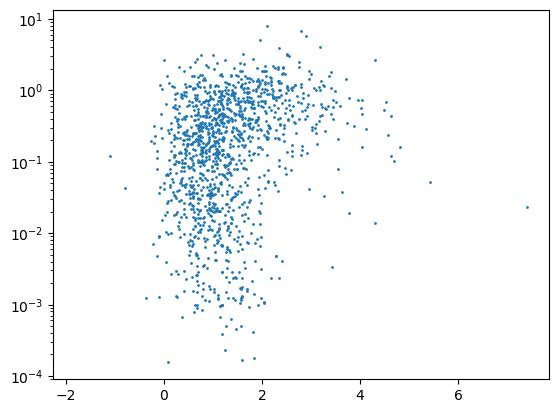

In [5]:
plt.scatter((df['OXYSURF'] - df['OXYMAX']), df['CPUE_MTSQKM'].tolist(), s=1)
plt.yscale('log')
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 [Text(0, 0, 'croaker'),
  Text(1, 0, 'TRICHIU_LEPTUR'),
  Text(2, 0, 'seatrout'),
  Text(3, 0, 'CHLOROS_CHRYSU'),
  Text(4, 0, 'LEIOSTO_XANTHU'),
  Text(5, 0, 'STENOTO_CAPRIN'),
  Text(6, 0, 'SYNODUS_FOETEN'),
  Text(7, 0, 'PEPRILU_ALEPID'),
  Text(8, 0, 'ARIUS_FELIS'),
  Text(9, 0, 'PRIONOT_LONGIS'),
  Text(10, 0, 'snapper'),
  Text(11, 0, 'TRACHUR_LATHAM'),
  Text(12, 0, 'LAGODON_RHOMBO'),
  Text(13, 0, 'SYACIUM_GUNTER'),
  Text(14, 0, 'TRACHYP_SIMILI'),
  Text(15, 0, 'ETRUMEU_TERES'),
  Text(16, 0, 'mackerel'),
  Text(17, 0, 'LOLIGO_PLEII'),
  Text(18, 0, 'SQUILLA_EMPUSA'),
  Text(19, 0, 'CALLINE_SAPIDU'),
  Text(20, 0, 'CENTROP_PHILAD'),
  Text(21, 0, 'anchovy'),
  Text(22, 0, 'menhaden'),
  Text(23, 0, 'SERRANU_ATROBR'),
  Text(24, 0, 'SAURIDA_BRASIL'),
  Text(25, 0, 'drum'),
  Text(26, 0, 'SICYONI_BREVIR'),
  Text(27, 0, 'PORTU

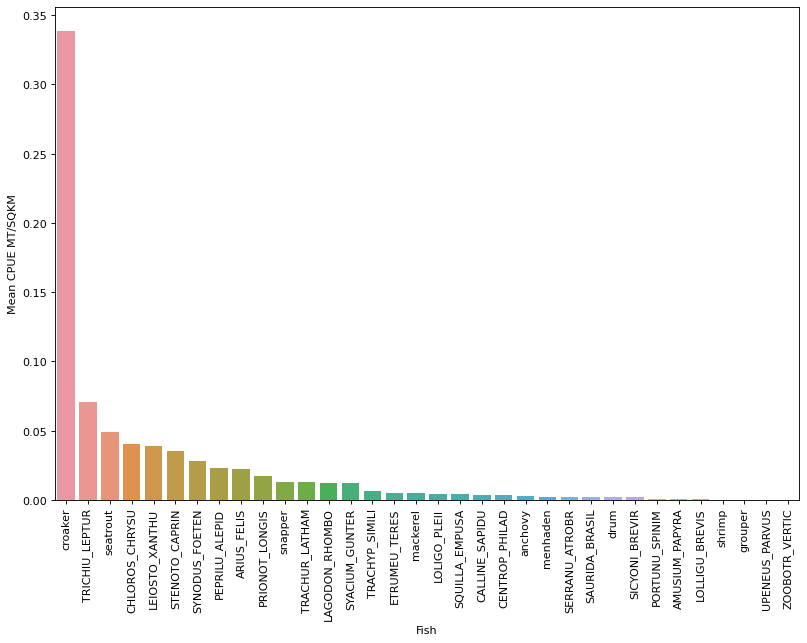

In [6]:
cpue = pd.DataFrame({'Fish' : list(cpue_dict.keys()),
                    'Mean CPUE MT/SQKM' : list(cpue_dict.values())})

cpue = cpue.sort_values(by=['Mean CPUE MT/SQKM'], ascending=False)
import seaborn as sns

figure(figsize=(12, 8), dpi=80)
sns.barplot(x='Fish', y="Mean CPUE MT/SQKM", data=cpue)
plt.xticks(rotation=90)

[Text(0.5, 0, 'CLD_COVER'),
 Text(1.5, 0, 'SECCHI_DSK'),
 Text(2.5, 0, 'WECOLOR'),
 Text(3.5, 0, 'PRECIP'),
 Text(4.5, 0, 'DEPTH_ESRF'),
 Text(5.5, 0, 'DEPTH_EMID'),
 Text(6.5, 0, 'DEPTH_EMAX'),
 Text(7.5, 0, 'DEPTH_EWTR'),
 Text(8.5, 0, 'TEMPSURF'),
 Text(9.5, 0, 'TEMPMID'),
 Text(10.5, 0, 'TEMPMAX'),
 Text(11.5, 0, 'SALSURF'),
 Text(12.5, 0, 'SALMID'),
 Text(13.5, 0, 'SALMAX'),
 Text(14.5, 0, 'CHLORSURF'),
 Text(15.5, 0, 'CHLORMID'),
 Text(16.5, 0, 'CHLORMAX'),
 Text(17.5, 0, 'OXYSURF'),
 Text(18.5, 0, 'OXYMID'),
 Text(19.5, 0, 'OXYMAX'),
 Text(20.5, 0, 'TURBSURF'),
 Text(21.5, 0, 'TURBMID'),
 Text(22.5, 0, 'TURBMAX'),
 Text(23.5, 0, 'LIGHT_CODE'),
 Text(24.5, 0, 'LATITUDE'),
 Text(25.5, 0, 'LONGITUDE'),
 Text(26.5, 0, 'OXY_DIFF'),
 Text(27.5, 0, 'SAL_DIFF'),
 Text(28.5, 0, 'TEMP_DIFF')]

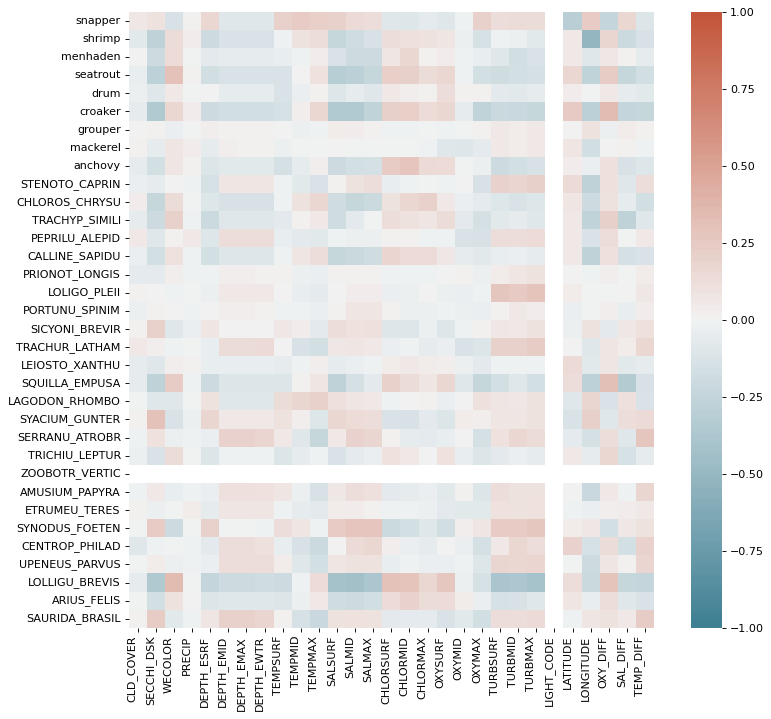

In [7]:



#https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec

#data = pd.read_csv('https://raw.githubusercontent.com/drazenz/heatmap/master/autos.clean.csv')

figure(figsize=(12, 10), dpi=80)

ax = sns.heatmap(
    corr_df.iloc[12:,:].T, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(220, 20, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
)


#print(data)
